In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
import os
import tensorflow as tf
from tensorflow import keras
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Activation, Flatten
import time
from keras.layers import Input
from keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation, BatchNormalization
from keras.layers import Dense, Activation, Flatten, Dropout
import numpy as np
import pandas as pd
import cv2
import glob
# import tensorflow_datasets as tfds
from keras.utils.vis_utils import plot_model
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import cifar10

In [5]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.cifar10.load_data()
assert X_train.shape == (50000, 32, 32, 3)
assert X_test.shape == (10000, 32, 32, 3)
assert Y_train.shape == (50000, 1)
assert Y_test.shape == (10000, 1)
label_name=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [6]:
print('X_train.shape  :', X_train.shape)
print('Y_train.shape  :', Y_train.shape)
print('X_test.shape   :', X_test.shape)
print('Y_test.shape   :', Y_test.shape)

X_train.shape  : (50000, 32, 32, 3)
Y_train.shape  : (50000, 1)
X_test.shape   : (10000, 32, 32, 3)
Y_test.shape   : (10000, 1)


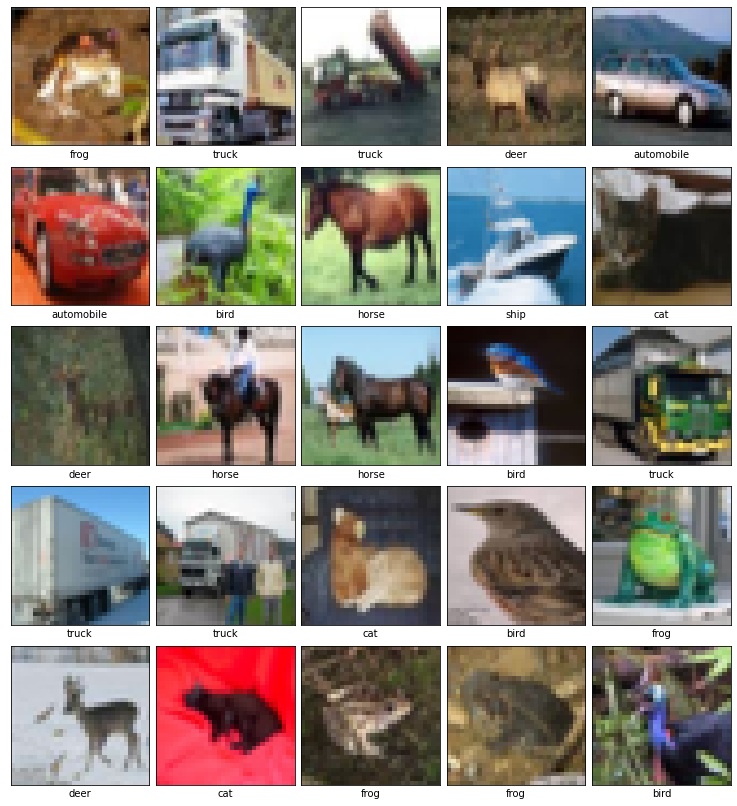

In [7]:
fig = plt.figure(figsize=(10, 10))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1.1, hspace=0.05, wspace=0.05)

for i in range(25):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.set(xlabel=label_name[Y_train[i][0]])


In [8]:
def create_model():
    img_input = Input(shape=(32, 32, 3),name="input_2")

    # Block 1
    x = Conv2D(10, (3, 3), padding='same', name='conv2d_4')(img_input)
    x=Activation('relu',name="activation_4")(x)
    x = Conv2D(10, (3, 3), padding='same', name='conv2d_5')(x)
    x=Activation('relu',name="activation_5")(x)

    x = MaxPooling2D((2, 2), strides=(2, 2), name='max_pooling2d_2')(x)
    
    # Block 2
    x = Conv2D(10, (3, 3), padding='same', name='conv2d_6')(x)
    x=Activation('relu',name="activation_6")(x)
    x = Conv2D(10, (3, 3), padding='same', name='conv2d_7')(x)
    x=Activation('relu',name="activation_7")(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='max_pooling2d_3')(x)
    x= Flatten(name='flatten_1')(x)
    out = Dense(10, activation='softmax', name='dense_1')(x)
    
    model = Model(img_input, out)
    return model

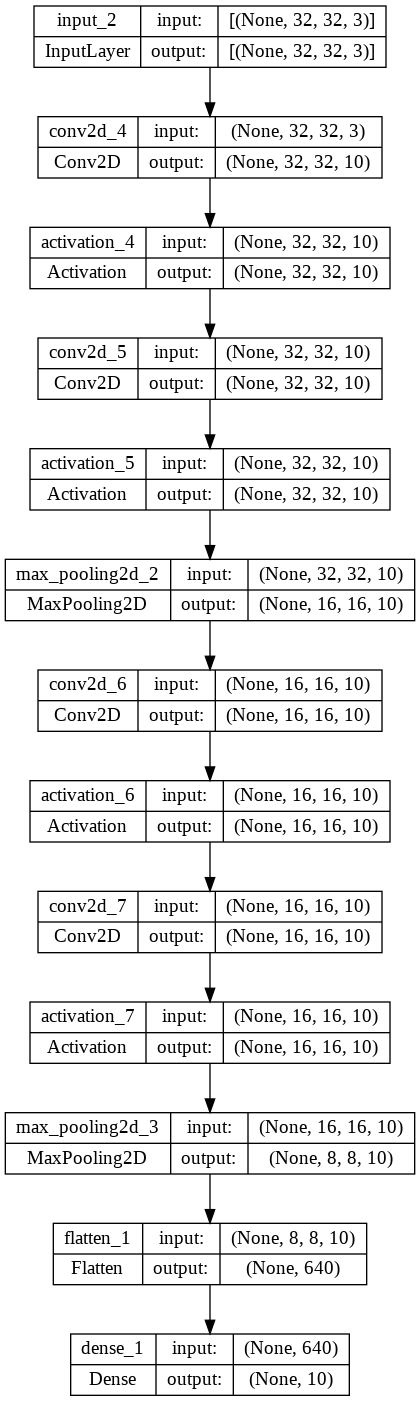

In [9]:
model = create_model()
layer_names = [layer.name for layer in model.layers]
plot_model(model, to_file="my_model.png", show_shapes=True)
# model.summary()

In [10]:
epochs=100
batch_size=128
learning_rate=0.0001

opt = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt ,metrics=['accuracy'])

#	t = now()
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=.3)
(loss, accuracy) = model.evaluate(X_test, Y_test, batch_size=batch_size)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Epoch 1/100
274/274 [==============================] - 7s 9ms/step - loss: 7.5276 - accuracy: 0.1289 - val_loss: 2.8879 - val_accuracy: 0.1418
Epoch 2/100
274/274 [==============================] - 2s 7ms/step - loss: 2.5423 - accuracy: 0.1492 - val_loss: 2.3252 - val_accuracy: 0.1644
Epoch 3/100
274/274 [==============================] - 2s 7ms/step - loss: 2.2538 - accuracy: 0.1763 - val_loss: 2.1820 - val_accuracy: 0.1883
Epoch 4/100
274/274 [==============================] - 2s 7ms/step - loss: 2.1459 - accuracy: 0.2049 - val_loss: 2.1075 - val_accuracy: 0.2141
Epoch 5/100
274/274 [==============================] - 2s 7ms/step - loss: 2.0882 - accuracy: 0.2259 - val_loss: 2.0666 - val_accuracy: 0.2347
Epoch 6/100
274/274 [==============================] - 2s 7ms/step - loss: 2.0505 - accuracy: 0.2424 - val_loss: 2.0388 - val_accuracy: 0.2471
Epoch 7/100
274/274 [==============================] - 2s 7ms/step - loss: 2.0207 - accuracy: 0.2567 - val_loss: 2.0200 - val_accuracy: 0.2543

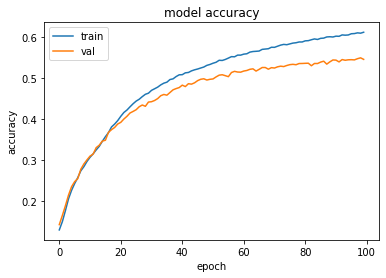

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

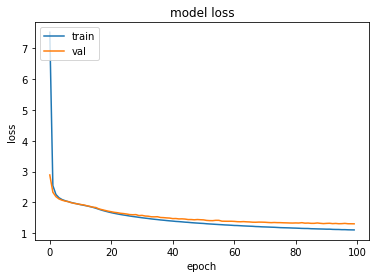

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [13]:
feature_maps = model.predict(np.expand_dims(X_test[2], axis=0))
print(feature_maps)

1/1 [==============================] - 0s 212ms/step
[[0.24930099 0.09839768 0.00170113 0.01548489 0.00816513 0.0010931
  0.0059577  0.02511665 0.3653071  0.22947563]]


In [14]:
print(layer_names[1:-2])

['conv2d_4', 'activation_4', 'conv2d_5', 'activation_5', 'max_pooling2d_2', 'conv2d_6', 'activation_6', 'conv2d_7', 'activation_7', 'max_pooling2d_3']


1/1 [==============================] - 0s 75ms/step


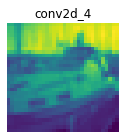

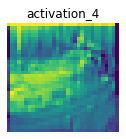

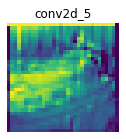

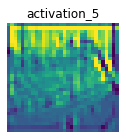

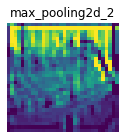

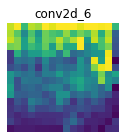

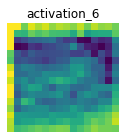

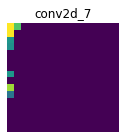

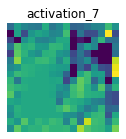

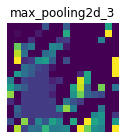

In [27]:
layer_names=['conv2d_4', 'activation_4', 'conv2d_5', 'activation_5', 'max_pooling2d_2', 'conv2d_6', 'activation_6', 'conv2d_7', 'activation_7', 'max_pooling2d_3']
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input,outputs=layer_outputs)
intermediate_activations = activation_model.predict(np.expand_dims(X_test[2], axis=0))
images_per_row = 1
max_images = 1

for layer_name, layer_activation in zip(layer_names, intermediate_activations):
    n_features = layer_activation.shape[-1]
    n_features = min(n_features, max_images)

    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))


    for col in range(n_cols):
      for row in range(images_per_row):
          channel_image = layer_activation[0,:, :, col * images_per_row + row]

          channel_image -= channel_image.mean()
          channel_image /= channel_image.std()
          channel_image *= 64
          channel_image += 128
          channel_image = np.clip(channel_image, 0, 255).astype('uint8')
          display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image
    scale = 2. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.axis('off')
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

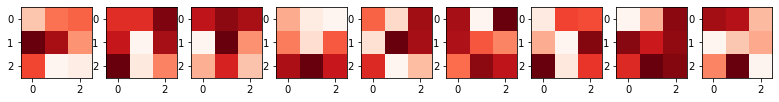

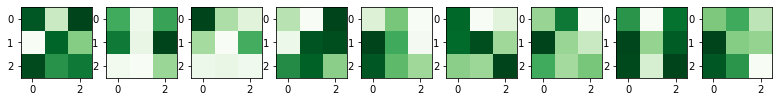

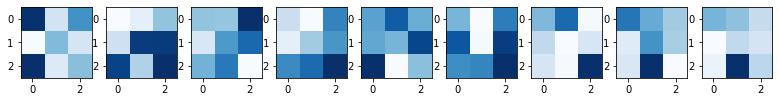

In [74]:
for channel,channel_color in enumerate(["Reds_r","Greens_r","Blues_r"]):
  x1w = model.get_weights()[0][:,:,channel,:]
  plt.figure(figsize=(15,15))
  for i in range(1,10):
      plt.subplot(1,10,i)
      plt.imshow(x1w[:,:,i],interpolation="nearest", cmap=channel_color)

  plt.show()

In [109]:
from keras.applications.resnet import ResNet50
image_input = Input(shape=(32, 32, 3))
model = ResNet50(input_tensor=image_input, include_top=True,weights="imagenet")


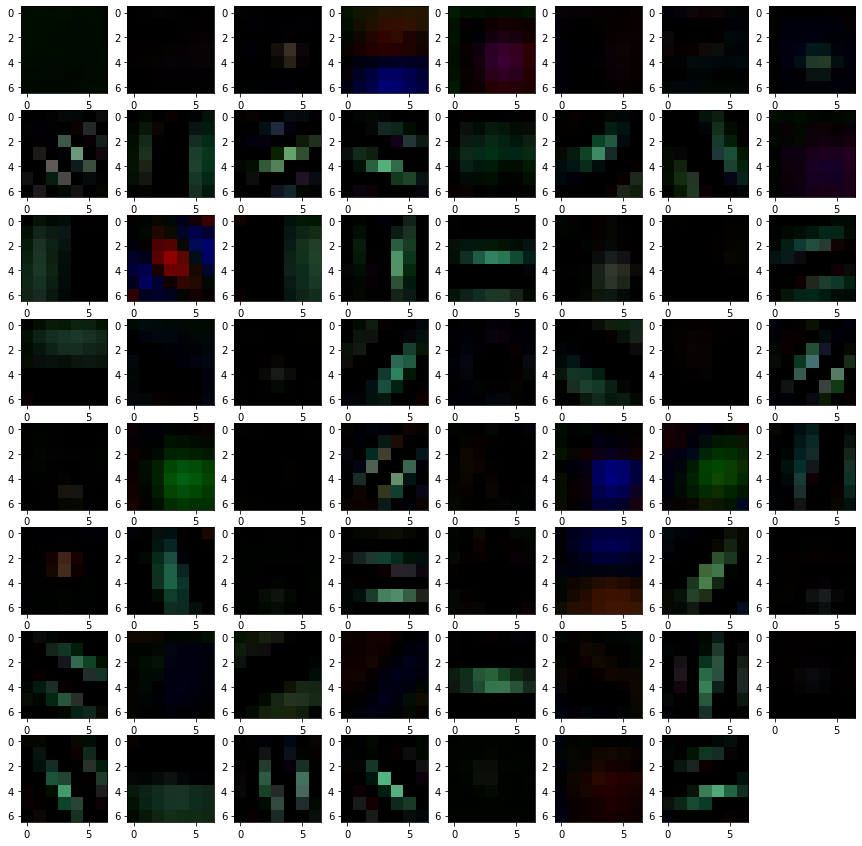

In [113]:
x1w = model.get_weights()[0][:,:,0,:]
x2w = model.get_weights()[0][:,:,1,:]
x3w = model.get_weights()[0][:,:,2,:]
plt.figure(figsize=(15,15))
for i in range(1,64):
    plt.subplot(8,8,i)
    merged = cv2.merge([x1w[:,:,i], x2w[:,:,i], x3w[:,:,i]])
    plt.imshow(merged,interpolation="nearest")

plt.show()




In [95]:
def create_model():
    img_input = Input(shape=(32, 32, 3),name="input_2")

    # Block 1
    x = Conv2D(10, (3, 3), padding='same', name='conv2d_4')(img_input)
    x=BatchNormalization()(x)
    x=Activation('relu',name="activation_4")(x)
    x = Conv2D(10, (3, 3), padding='same', name='conv2d_5')(x)
    x=BatchNormalization()(x)
    x=Activation('relu',name="activation_5")(x)

    x = MaxPooling2D((2, 2), strides=(2, 2), name='max_pooling2d_2')(x)
    
    # Block 2
    x = Conv2D(10, (3, 3), padding='same', name='conv2d_6')(x)
    x=BatchNormalization()(x)
    x=Activation('relu',name="activation_6")(x)
    x = Conv2D(10, (3, 3), padding='same', name='conv2d_7')(x)
    x=BatchNormalization()(x)
    x=Activation('relu',name="activation_7")(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='max_pooling2d_3')(x)
    x= Flatten(name='flatten_1')(x)
    out = Dense(10, activation='softmax', name='dense_1')(x)
    
    model = Model(img_input, out)
    return model

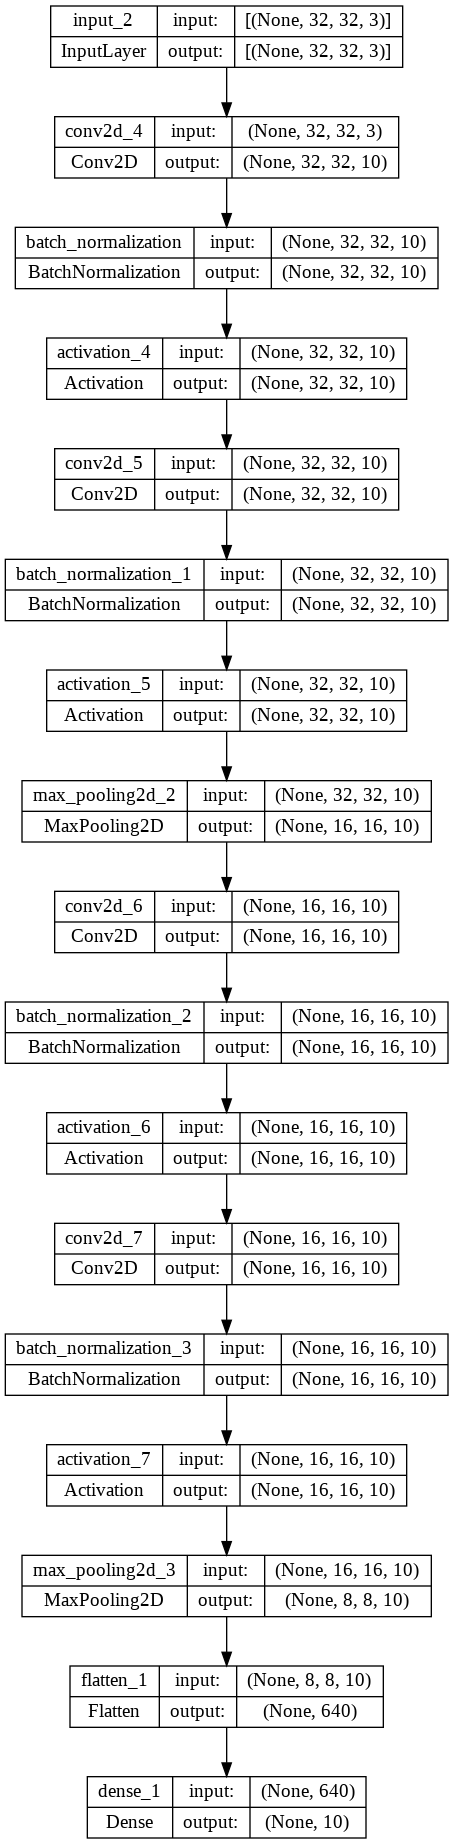

In [96]:
model = create_model()
layer_names = [layer.name for layer in model.layers]
plot_model(model, to_file="my_model.png", show_shapes=True)
# model.summary()

In [97]:
epochs=100
batch_size=128
learning_rate=0.0001

opt = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt ,metrics=['accuracy'])

#	t = now()
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=.3)
(loss, accuracy) = model.evaluate(X_test, Y_test, batch_size=batch_size)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Epoch 1/100
274/274 [==============================] - 4s 9ms/step - loss: 2.2539 - accuracy: 0.1928 - val_loss: 2.0131 - val_accuracy: 0.2700
Epoch 2/100
274/274 [==============================] - 2s 7ms/step - loss: 1.9041 - accuracy: 0.3066 - val_loss: 1.8442 - val_accuracy: 0.3315
Epoch 3/100
274/274 [==============================] - 2s 9ms/step - loss: 1.7626 - accuracy: 0.3598 - val_loss: 1.7402 - val_accuracy: 0.3731
Epoch 4/100
274/274 [==============================] - 2s 7ms/step - loss: 1.6654 - accuracy: 0.3969 - val_loss: 1.6550 - val_accuracy: 0.3977
Epoch 5/100
274/274 [==============================] - 2s 7ms/step - loss: 1.5881 - accuracy: 0.4272 - val_loss: 1.5823 - val_accuracy: 0.4259
Epoch 6/100
274/274 [==============================] - 2s 7ms/step - loss: 1.5240 - accuracy: 0.4497 - val_loss: 1.5350 - val_accuracy: 0.4471
Epoch 7/100
274/274 [==============================] - 2s 7ms/step - loss: 1.4690 - accuracy: 0.4705 - val_loss: 1.4790 - val_accuracy: 0.4679

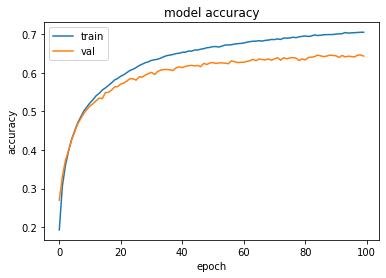

In [98]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

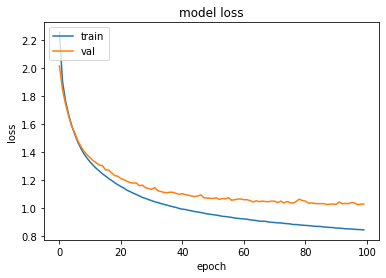

In [99]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [102]:
def create_model():
    img_input = Input(shape=(32, 32, 3),name="input_2")

    # Block 1
    x = Conv2D(10, (3, 3), padding='same', name='conv2d_4')(img_input)
    x=BatchNormalization()(x)
    x=Activation('relu',name="activation_4")(x)
    x = Conv2D(10, (3, 3), padding='same', name='conv2d_5')(x)
    x=BatchNormalization()(x)
    x=Activation('relu',name="activation_5")(x)

    x = MaxPooling2D((2, 2), strides=(2, 2), name='max_pooling2d_2')(x)
    
    # Block 2
    x = Conv2D(10, (3, 3), padding='same', name='conv2d_6')(x)
    x=BatchNormalization()(x)
    x=Activation('relu',name="activation_6")(x)
    x = Conv2D(10, (3, 3), padding='same', name='conv2d_7')(x)
    x=BatchNormalization()(x)
    x=Activation('relu',name="activation_7")(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='max_pooling2d_3')(x)

    # Block 3
    x = Conv2D(10, (3, 3), padding='same', name='block3_conv1')(x)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x = Conv2D(10, (3, 3), padding='same', name='block3_conv2')(x)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x = Conv2D(10, (3, 3), padding='same', name='block3_conv3')(x)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    x= Flatten(name='flatten_1')(x)
    out = Dense(10, activation='softmax', name='dense_1')(x)
    
    model = Model(img_input, out)
    return model

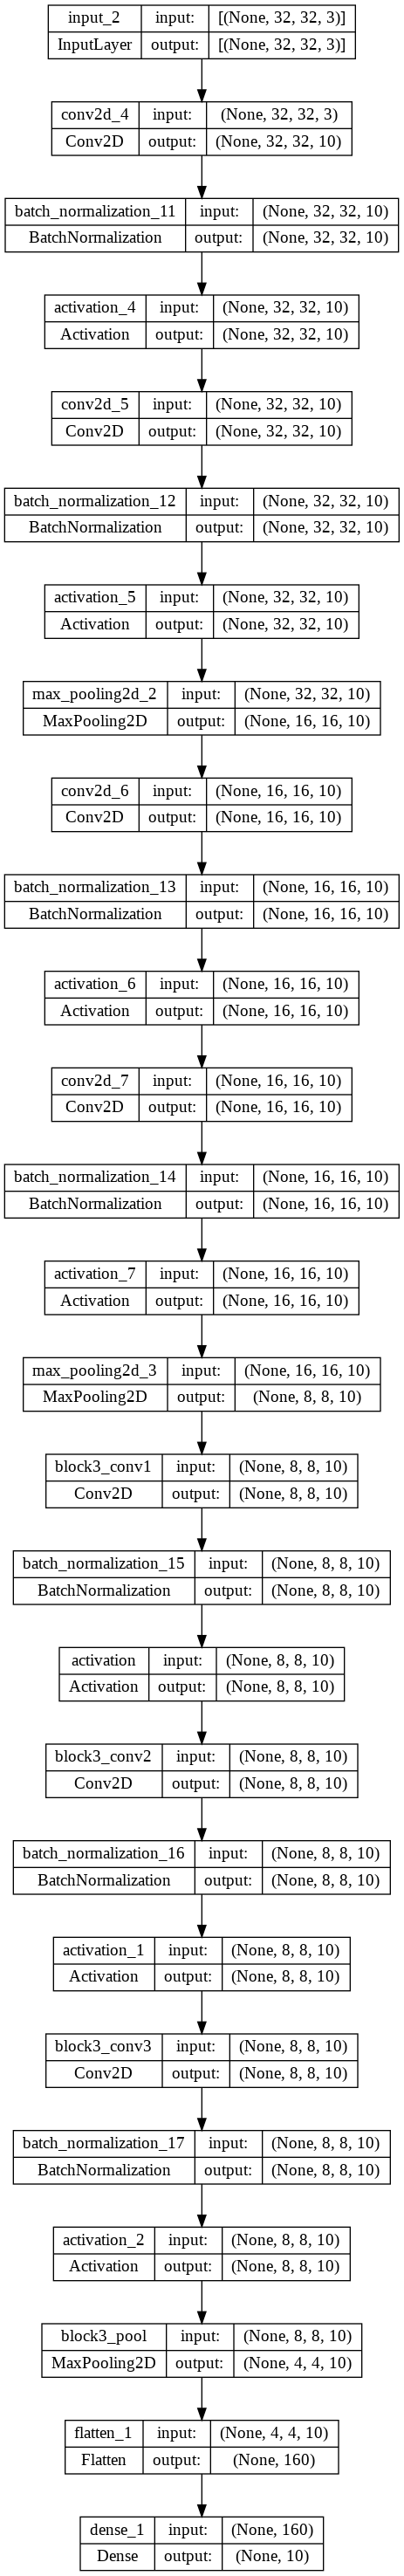

In [103]:
model = create_model()
layer_names = [layer.name for layer in model.layers]
plot_model(model, to_file="my_model.png", show_shapes=True)
# model.summary()

In [104]:
epochs=100
batch_size=128
learning_rate=0.0001

opt = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt ,metrics=['accuracy'])

#	t = now()
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=.3)
(loss, accuracy) = model.evaluate(X_test, Y_test, batch_size=batch_size)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Epoch 1/100
274/274 [==============================] - 4s 11ms/step - loss: 2.4695 - accuracy: 0.1443 - val_loss: 2.1881 - val_accuracy: 0.1974
Epoch 2/100
274/274 [==============================] - 3s 10ms/step - loss: 2.0807 - accuracy: 0.2412 - val_loss: 2.0025 - val_accuracy: 0.2628
Epoch 3/100
274/274 [==============================] - 2s 9ms/step - loss: 1.9049 - accuracy: 0.2941 - val_loss: 1.8621 - val_accuracy: 0.3141
Epoch 4/100
274/274 [==============================] - 3s 10ms/step - loss: 1.7887 - accuracy: 0.3344 - val_loss: 1.7601 - val_accuracy: 0.3487
Epoch 5/100
274/274 [==============================] - 2s 9ms/step - loss: 1.7069 - accuracy: 0.3662 - val_loss: 1.6908 - val_accuracy: 0.3713
Epoch 6/100
274/274 [==============================] - 2s 9ms/step - loss: 1.6475 - accuracy: 0.3906 - val_loss: 1.6530 - val_accuracy: 0.3869
Epoch 7/100
274/274 [==============================] - 3s 11ms/step - loss: 1.5992 - accuracy: 0.4107 - val_loss: 1.6228 - val_accuracy: 0.

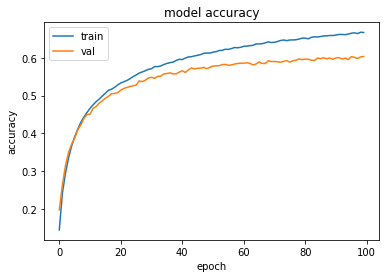

In [105]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

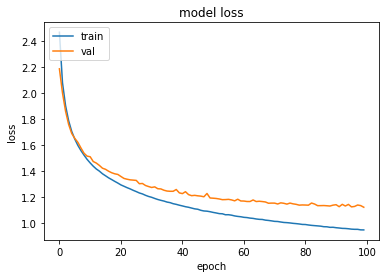

In [106]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()